In [3]:
import keras.utils
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.losses import binary_crossentropy
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional, LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, roc_auc_score



In [4]:
label_encoder = LabelEncoder()
train_df = 'synthetic_train.csv'
val_df = 'synthetic_train.csv'
#load data and specify the text column and the sentiment column
#Train data
train_data = pd.read_csv(train_df)
X_train = train_data['sentence'].values  #text column
y_train = train_data['sentiment'].values  #sentiment column
#Validation data
val_data = pd.read_csv(val_df)
X_val = train_data['sentence'].values  #text column
y_val = train_data['sentiment'].values  #sentiment column

#encoded the label to a numerical tag for model to understand
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
# data = pd.read_csv('TV.csv')
#
# # Split the data into training and validation sets
# X = data['Nhận xét đánh giá'].values
# y = data['Cảm xúc'].values
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the labels
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)


In [5]:
max_words = 5000  # Maximum number of words to consider
max_len = 1000  # Maximum length of a sequence


# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_train_seq = keras.utils.pad_sequences(X_train_seq, maxlen=max_len)
X_val_seq = keras.utils.pad_sequences(X_val_seq, maxlen=max_len)

In [6]:
embedding_dim = 120  # Dimensionality of word embeddings
num_filters = 128  # Number of filters in the convolutional layer
kernel_size = 5
num_classes = len(label_encoder.classes_)  # Number of output classes
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Conv1D(num_filters, kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




In [7]:
batch_size = 64
epochs = 10

model.fit(X_train_seq, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_seq, y_val))


Epoch 1/10
128/128 [==============================] - 51s 388ms/step - loss: 0.6879 - accuracy: 0.7085 - val_loss: 0.4118 - val_accuracy: 0.8206
Epoch 2/10
128/128 [==============================] - 62s 487ms/step - loss: 0.3874 - accuracy: 0.8290 - val_loss: 0.3038 - val_accuracy: 0.8783
Epoch 3/10
128/128 [==============================] - 51s 395ms/step - loss: 0.3002 - accuracy: 0.8727 - val_loss: 0.2395 - val_accuracy: 0.9086
Epoch 4/10
128/128 [==============================] - 61s 475ms/step - loss: 0.2413 - accuracy: 0.9055 - val_loss: 0.1820 - val_accuracy: 0.9391
Epoch 5/10
128/128 [==============================] - 53s 418ms/step - loss: 0.1902 - accuracy: 0.9290 - val_loss: 0.1418 - val_accuracy: 0.9568
Epoch 6/10
128/128 [==============================] - 62s 487ms/step - loss: 0.1491 - accuracy: 0.9473 - val_loss: 0.1089 - val_accuracy: 0.9682
Epoch 7/10
128/128 [==============================] - 78s 608ms/step - loss: 0.1127 - accuracy: 0.9653 - val_loss: 0.0776 - val_ac

In [8]:
loss, accuracy = model.evaluate(X_val_seq, y_val)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {accuracy}")

255/255 [==============================] - 10s 41ms/step - loss: 0.0331 - accuracy: 0.9956
Validation loss: 0.03312553092837334
Validation accuracy: 0.9955795407295227


104/104 [==============================] - 3s 33ms/step


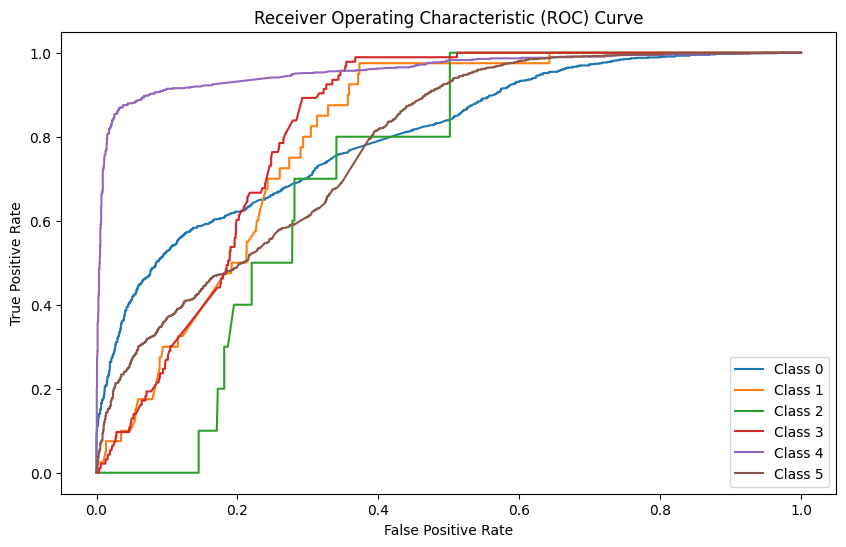

AUC (Class 0): 0.8015592457493137
AUC (Class 1): 0.803372713414634
AUC (Class 2): 0.7188972809667673
AUC (Class 3): 0.8215743508235286
AUC (Class 4): 0.9589108761360772
AUC (Class 5): 0.7762603427895981


In [18]:

# # Assuming you have true class labels in y_val (0, 1, 2, 3, 4, 5, etc.)
# num_classes = len(np.unique(y_val))
#
# # Calculate ROC curve and AUC for each class
# fpr = dict()
# tpr = dict()
# auc = dict()
# for i in range(num_classes):
#     fpr[i], tpr[i], _ = roc_curve((y_val == i).astype(int), y_pred_probs[:, i])
#     auc[i] = roc_auc_score((y_val == i).astype(int), y_pred_probs[:, i])
#
# # Create a list of class labels based on unique values in y_val
# class_labels = np.unique(y_val)
#
# # Print AUC for each class along with their labels
# for i in range(num_classes):
#     label = class_labels[i]
#     print(f"AUC (Class {label}): {auc[i]}")

In [9]:
y_pred = model.predict(X_val_seq)
# Convert numerical labels to original labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred_labels)

# Convert true labels to original labels
y_val_labels = label_encoder.inverse_transform(y_val)

# Generate classification report
report = classification_report(y_val_labels, y_pred_labels)
print(report)

255/255 [==============================] - 10s 38ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2724
           1       1.00      1.00      1.00      2712
           2       0.99      1.00      0.99      2708

    accuracy                           1.00      8144
   macro avg       1.00      1.00      1.00      8144
weighted avg       1.00      1.00      1.00      8144

